# Deaths of People Experiencing Homelessness in Toronto 2017-2023 years
This analysis explore the most common reasons of deaths between people experiencing homelessness in Toronto in period of 2017-2023 years. I used the dataset [Deaths of People Experiencing Homelessness](https://open.toronto.ca/dataset/deaths-of-people-experiencing-homelessness/) from [City of Toronto Open Data](https://open.toronto.ca/). 

Dataset is the one table, that has the following features: 
| Column	| Description |
| -------- | ------- |
| _id	| Unique row identifier for Open Data database |
| Year of death	| This represents the year that the death occurred. |
| Month of death	| This represents the month that the death occurred. |
| Count	| This represents the number of deaths in the specified category. Numbers have been aggregated to maintain privacy. |


For this project I prepared, analyzed and visualized data, trying to define what exactly causes the most death between people experiencing homelessness. 

In [32]:
#to import libraries to work with
import pandas as pd
import matplotlib.pyplot as plt


In [33]:
#to read csv file and create a dataframe
df = pd.read_csv('Data/Raw/Homeless deaths by cause.csv')
df

,_id,Year of death,Cause_of_death,Age_group,Gender,Count
0,1,2023,Cardiovascular Disease,Unknown,Male,1
1,2,2019,Other,20-39,Male,1
2,3,2018,Suicide,20-39,Male,1
3,4,2017,Accident,40-59,Male,2
4,5,2022,Other,40-59,Female,1
...,...,...,...,...,...,...
262,263,2017,Drug Toxicity,20-39,Female,3
263,264,2020,Drug toxicity,20-39,Male,21
264,265,2022,Unknown,40-59,Male,5
265,266,2019,Unknown,20-39,Male,3


In [34]:
#to clean data prior to visualising
df['Cause_of_death'] = df['Cause_of_death'].str.strip() #to delete all excessive spaces 
df['Cause_of_death'] = df['Cause_of_death'].str.replace('Drug toxicity','Drug Toxicity') #to replace duplicating values

In [35]:
#To create an aggregated dataframe for visualisation
death_reasons = df.groupby('Cause_of_death')['Count'].sum().reset_index()
death_reasons_sorted = death_reasons.sort_values(by='Count', ascending=False)
death_reasons_sorted

,Cause_of_death,Count
4,Drug Toxicity,458
10,Unknown,225
3,Cardiovascular Disease,104
7,Other,50
2,Cancer,44
0,Accident,43
9,Suicide,30
8,Pneumonia,23
5,Homicide,21
6,Infection,10


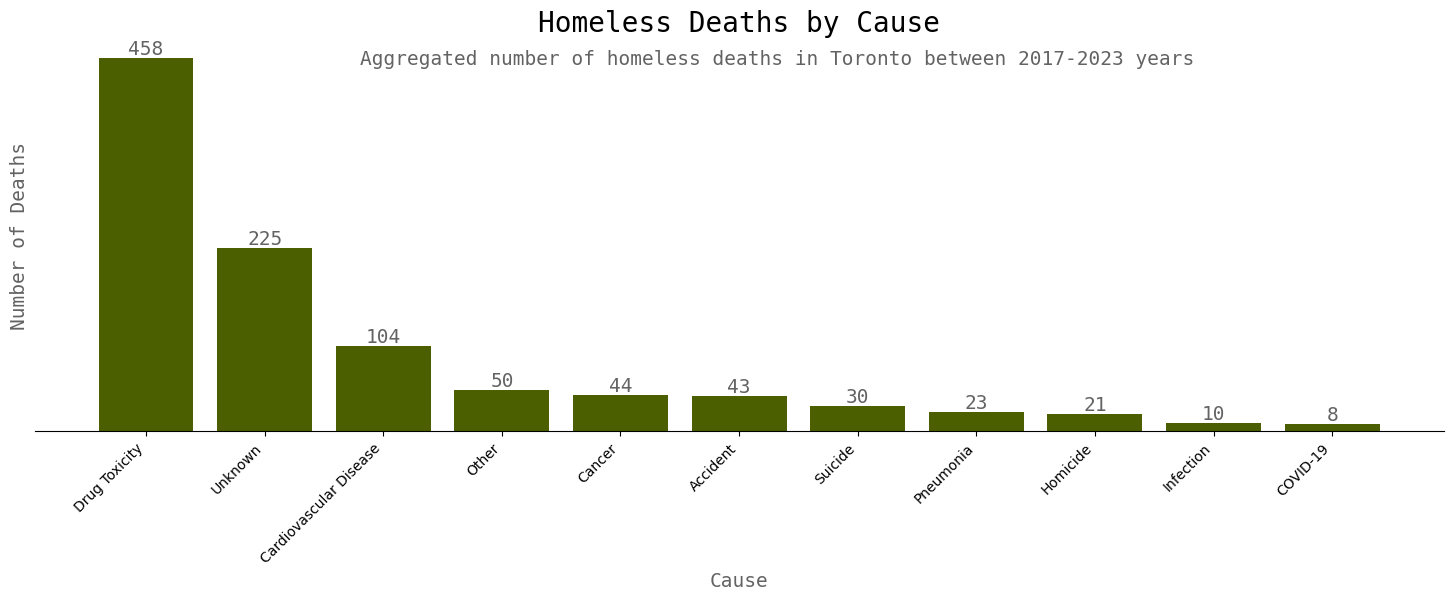

In [36]:
#To assign x and y for a visual
x1 = death_reasons_sorted['Cause_of_death']
y1 = death_reasons_sorted['Count']

#to create a figure
fig, ax = plt.subplots(figsize = (15, 5))

#to create font dictionaries
font1 = {'family':'monospace','color':'black','size':20}
font2 = {'family':'monospace','color':'#636363','size':14}
font3 = {'family':'monospace','color':'grey','size':10}

#to create bar graph visualisation
bars = ax.bar(x1, y1, 
       color = '#4b5f00')

#to set titles and x and y labels
ax.set_title('Homeless Deaths by Cause', fontdict=font1)
ax.set_ylabel('Number of Deaths', fontdict=font2)
ax.set_xlabel('Cause', fontdict=font2)

#to set tight layout for figure 
fig.tight_layout()

#to add subtitle to the visual
ax.text(x=1.8, y=450, s='Aggregated number of homeless deaths in Toronto between 2017-2023 years', fontdict=font2)

#to rotate x-labels to fit them without overlapping
plt.xticks(rotation=45, ha='right')

#to remove ticks and labels for y-axis
ax.yaxis.set_major_locator(plt.NullLocator())

#to add values at the top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, 
            yval, 
            int(yval), 
            ha='center', 
            va='bottom', 
            fontdict=font2)

#to remove frame around the visual
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)



The analysis shows that the most deaths between people experiencing homelessnes are caused by drug toxicity. At the same time over 200 number of deaths have unknown cause, which can dramatically change the statistics in one or another way. The recommendation would be to make more efforts to identify the cause of deaths between homeless people and also improve access to Naloxone kits and Emergency services for people experiencing homelessness with drug addiction. 

## Drug toxicity deaths trend between 2017-2023 years 
For the second part of this project I explore the over the years trend of deaths caused by drug toxicity to find out if this is something that increase or decrease over time. 

In [37]:
#to create a filtered dataframe
drug_toxicity = df[df['Cause_of_death']=='Drug Toxicity']
drug_toxicity

#to sum how many deaths was caused by drug toxicity over time: 
drug_toxicity_yearly = drug_toxicity.groupby('Year of death')['Count'].sum().reset_index()
drug_toxicity_yearly

#to assign x and y for visualisation: 
x2 = drug_toxicity_yearly['Year of death']
y2 = drug_toxicity_yearly['Count']



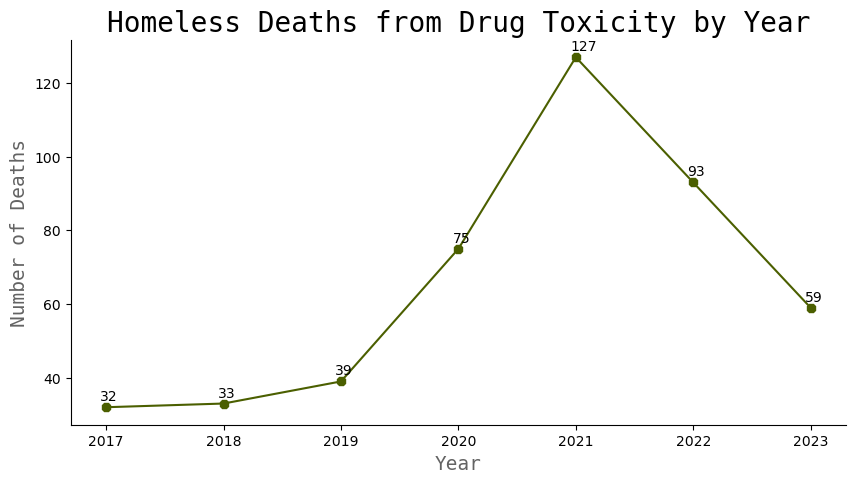

In [38]:
#to create a figure for visualisation
fig, ax = plt.subplots(figsize = (10,5))

#to create lineplot
plots = ax.plot(x2, y2,
        marker = '8',
        color = '#4b5f00'
        )

#to set titles and labels
ax.set_title('Homeless Deaths from Drug Toxicity by Year', fontdict=font1)
ax.set_ylabel('Number of Deaths', fontdict=font2)
ax.set_xlabel('Year', fontdict=font2)

#to show values on the line 
for i,j in zip(x2,y2):
    ax.annotate(str(j),xy=(i-0.05,j+1.8))

#to remove top and right frame lines: 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



As we can see from this visual, the most deaths from drug toxicity were in 2020 - 2022 years, with dramatic spike in 2021 with 127 deaths caused by drug toxicity. Currently trend shows decrease of deaths caused by drug toxicity. 

## Gender and Age distribution of deaths of people experiencing homelessness

In [39]:
#to count how many deaths between different age groups excluding unknown age: 
death_age = df[df['Age_group']!='Unknown'].groupby('Age_group')['Count'].sum().reset_index()
death_age_sorted = death_age.sort_values(by='Count', ascending=False)
death_age_sorted

,Age_group,Count
1,40-59,420
2,60+,282
0,20-39,251
3,<20,9


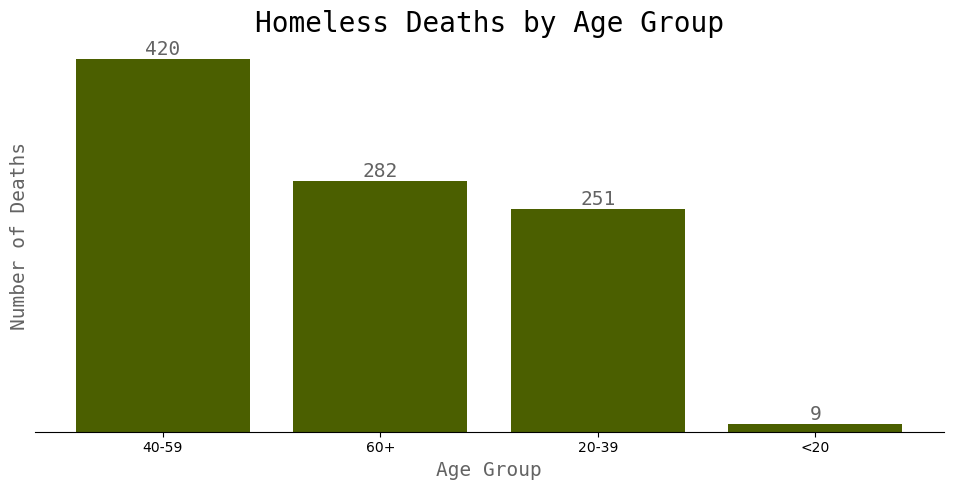

In [40]:
#To assign x and y for a visual
x3 = death_age_sorted['Age_group']
y3 = death_age_sorted['Count']

#to create a figure
fig, ax = plt.subplots(figsize = (10, 5))

#to create bar graph visualisation
bars = ax.bar(x3, y3, 
       color = '#4b5f00')

#to set titles and x and y labels
ax.set_title('Homeless Deaths by Age Group', fontdict=font1)
ax.set_ylabel('Number of Deaths', fontdict=font2)
ax.set_xlabel('Age Group', fontdict=font2)

#to set tight layout for figure 
fig.tight_layout()


#to rotate x-labels to fit them without overlapping
#plt.xticks(rotation=45, ha='right')

#to remove ticks and labels for y-axis
ax.yaxis.set_major_locator(plt.NullLocator())

#to add values at the top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, 
            yval, 
            int(yval), 
            ha='center', 
            va='bottom', 
            fontdict=font2)

#to remove frame around the visual
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

In [41]:
gender = df[df['Gender']!='Unknown'].groupby('Gender')['Count'].sum().reset_index()
gender

,Gender,Count
0,Female,218
1,Male,788


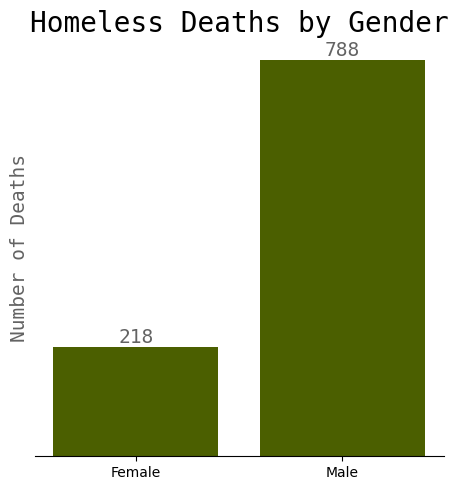

In [42]:
#To assign x and y for a visual
x4 = gender['Gender']
y4 = gender['Count']

#to create a figure
fig, ax = plt.subplots(figsize = (5, 5))

#to create bar graph visualisation
bars = ax.bar(x4, y4, 
       color = '#4b5f00')

#to set titles and x and y labels
ax.set_title('Homeless Deaths by Gender', fontdict=font1)
ax.set_ylabel('Number of Deaths', fontdict=font2)

#to set tight layout for figure 
fig.tight_layout()

#to remove ticks and labels for y-axis
ax.yaxis.set_major_locator(plt.NullLocator())

#to add values at the top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, 
            yval, 
            int(yval), 
            ha='center', 
            va='bottom', 
            fontdict=font2)

#to remove frame around the visual
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

Our analysis shows that most deaths among the homeless happen in people aged 40-59 years. We also found that homeless men are three times more likely to die than homeless women. These results suggest that we need to focus more on helping middle-aged people and address the higher risks faced by homeless men. It can be also a sign that the population of homeless men are bigger than the population of women experiencing homelessness. 